# 经典Runge-Kutta方法

\begin{array}{l}
y_{k+1}=y_k+h \cdot \frac{k_1+2 k_2+2 k_3+k_4}{6} \\
k_1=f\left(x_k, y_k\right) \\
k_2=f\left(x_k+\frac{1}{2} h, y_k+h \cdot \frac{1}{2} k_1\right) \\
k_3=f\left(x_k+\frac{1}{2} h, y_k+h \cdot \frac{1}{2} k_2\right) \\
k_4=f\left(x_k+h, \quad y_k+h \cdot k_3\right)
\end{array}

In [7]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文


def k1(x, y, f):
    return f(x, y)


def k2(x, y, h, k, f):
    return f(x + 1 / 2 * h, y + h * 1 / 2 * k)


def k3(x, y, h, k, f):
    return f(x + 1 / 2 * h, y + h * 1 / 2 * k)


def k4(x, y, h, k, f):
    return f(x + h, y + h * k)


def k_n(x, y, h, f):
    k_1 = k1(x, y, f)
    k_2 = k2(x, y, h, k_1, f)
    k_3 = k3(x, y, h, k_2, f)
    k_4 = k4(x, y, h, k_3, f)
    return k_1, k_2, k_3, k_4


def runge_kutta(x, y, b, h, f):
    result = {x: y}
    while True:
        if x >= b:
            break
        k_1, k_2, k_3, k_4 = k_n(x, y, h, f)
        y = y + h * 1 / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        x = x + h
        result[x] = y
    return result

In [10]:

def y_grad(x, y):
    return y - 2 * x / y


x0 = 0
y0 = 1
b = 0.6
h = 0.1
f = y_grad
xydict = runge_kutta(x0, y0, b, h, f)
xydict

{0: 1,
 0.1: 1.0954455316930938,
 0.2: 1.1832167455059932,
 0.30000000000000004: 1.2649122283403924,
 0.4: 1.3416423537503714,
 0.5: 1.414215577890085,
 0.6: 1.4832422227719921}

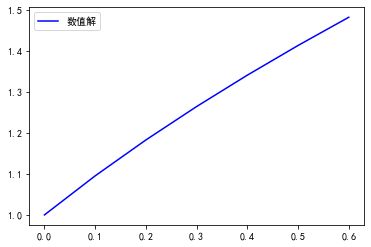

In [9]:
plt.plot(xydict.keys(), xydict.values(), 'b-', label='数值解')


plt.legend()
plt.show()